In [78]:
import numpy as np
from rlforge.agents import BanditAgent 
from rlforge.environments import Bandits
import matplotlib.pyplot as plt

In [79]:
env = Bandits(k=10)

agent = BanditAgent(num_actions=env.k, epsilon=0.1)

num_steps = 1000
rewards = []
action_history = []

for t in range(num_steps):
    # Agent selects an action
    action = agent.select_action()

    # Environment returns a reward
    reward = env.pull(action)

    # Agent updates its Q-value estimate
    agent.update(action, reward)

    rewards.append(reward)
    action_history.append(action)

In [80]:
print("Average reward:", np.mean(rewards))
print("Estimated Q-values:", agent.q_values)
print("True mean rewards:", env.mean_rewards)
print("Optimal action (true):", env.optimal_action())
print("Agent's greedy action:", np.argmax(agent.q_values))

Average reward: 1.3105387026747395
Estimated Q-values: [-0.24342988  1.05995444  0.66102074  0.7289168  -0.08021597 -0.08665717
  0.87304943  1.48985842 -0.31692571 -0.15518428]
True mean rewards: [-0.41531093  1.16204048  0.45342524  0.74355964 -0.13787546 -0.28189774
  0.99545416  1.50224332  0.08070224 -0.50111904]
Optimal action (true): 7
Agent's greedy action: 7


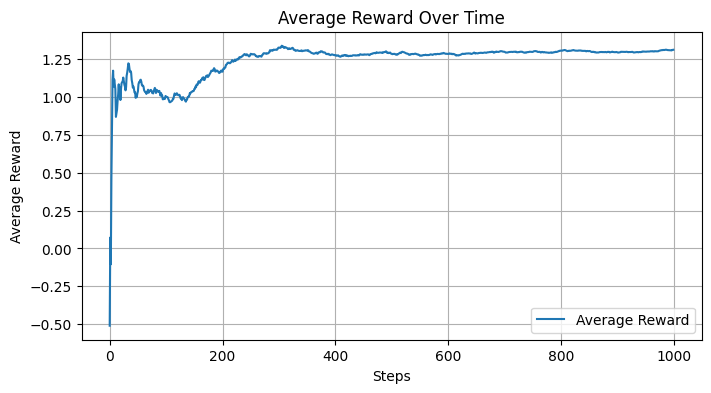

In [81]:
avg_rewards = np.cumsum(rewards) / (np.arange(num_steps) + 1)
plt.figure(figsize=(8,4))
plt.plot(avg_rewards, label="Average Reward")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.legend()
plt.grid(True)
plt.show()

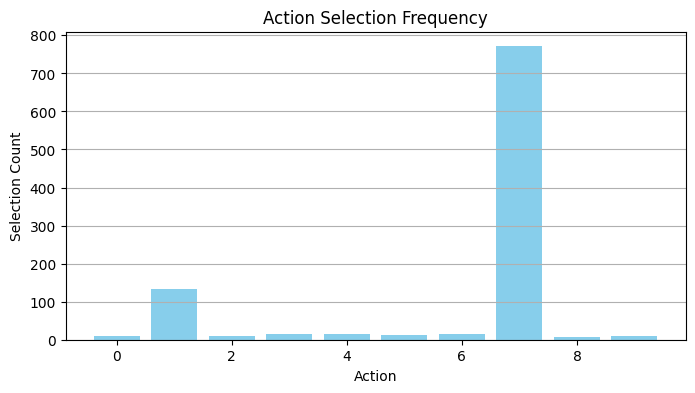

In [82]:
plt.figure(figsize=(8,4))
action_counts = np.bincount(action_history, minlength=env.k)
plt.bar(np.arange(env.k), action_counts, color="skyblue")
plt.xlabel("Action")
plt.ylabel("Selection Count")
plt.title("Action Selection Frequency")
plt.grid(True, axis="y")
plt.show()

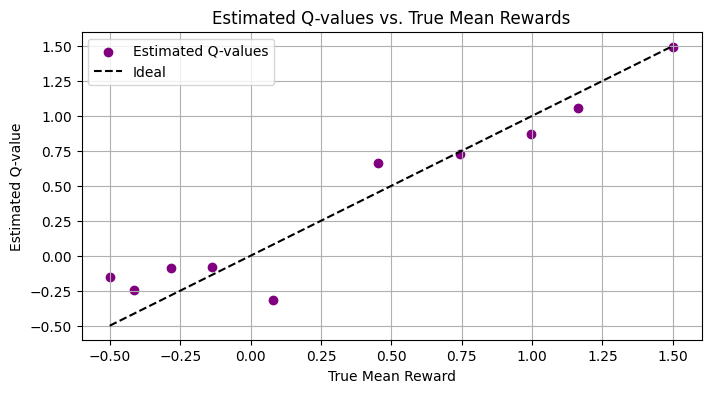

In [83]:
plt.figure(figsize=(8,4))
plt.scatter(env.mean_rewards, agent.q_values, color="purple", label="Estimated Q-values")
plt.plot([min(env.mean_rewards), max(env.mean_rewards)],
         [min(env.mean_rewards), max(env.mean_rewards)], "k--", label="Ideal")
plt.xlabel("True Mean Reward")
plt.ylabel("Estimated Q-value")
plt.title("Estimated Q-values vs. True Mean Rewards")
plt.legend()
plt.grid(True)
plt.show()